In [70]:
%pylab inline
from datetime import datetime
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


In [71]:
#from numpy import genfromtxt
#original_data = genfromtxt('sub_news.csv', delimiter=',')
import pandas as pd 
dataset = pd.read_csv('sub_news_withy.csv') 
dataset.dtypes


IDLink               float64
Title                 object
Headline              object
Source                object
Topic                 object
PublishDate           object
SentimentTitle       float64
SentimentHeadline    float64
Facebook               int64
GooglePlus             int64
LinkedIn               int64
y_maximum            float64
y_esssup               int64
y_speed              float64
y_t_speed              int64
y_classlabel           int64
ab                     int64
bc                     int64
all                    int64
early10              float64
early20              float64
dtype: object

In [74]:
sum(dataset["all"])

432

In [3]:
data_rf = dataset.iloc[:, [4,5,6,7,15,11,12,13,14,16,17,18,19,20]]
data_rf.head()

,Topic,PublishDate,SentimentTitle,SentimentHeadline,y_classlabel,y_maximum,y_esssup,y_speed,y_t_speed,ab,bc,all,early10,early20
0,economy,2015-11-12 08:40:12,0.091538,0.042664,2,3.332205,111,0.272733,53,0,1,0,0.000000,0.000000
1,economy,2016-02-09 22:40:21,0.041667,0.013032,2,4.330733,116,0.317557,21,1,0,0,0.000000,3.713572
2,economy,2016-05-06 04:00:00,0.036084,-0.174838,2,5.220356,142,0.201711,45,1,0,0,0.000000,0.000000
3,economy,2016-02-04 04:26:00,-0.259851,-0.019858,2,2.944439,125,0.082215,43,1,0,0,0.000000,0.000000
4,economy,2015-11-24 10:47:12,0.100549,-0.004546,3,1.098612,2,0.104235,10,0,1,1,1.098612,1.098612


In [4]:
data_onehot = data_rf.copy()
data_onehot = pd.get_dummies(data_onehot, columns=["Topic"])

data_new = data_onehot
data_new.head()
print(sorted(data_new['PublishDate'])[1])
print(sorted(data_new['PublishDate'], reverse=True)[1])


2015-11-09 23:49:13
2016-07-05 13:01:14


In [5]:
# data_new =data_new[(data_new['Facebook']>10)]
data_new["PublishDate"] = pd.to_datetime(data_new["PublishDate"])
#data_new["PublishDate"]

In [6]:
bins = [datetime.strptime('2015-11-01 00:00:00','%Y-%m-%d %H:%M:%S'),
        datetime.strptime('2016-01-31 00:00:00','%Y-%m-%d %H:%M:%S'),
        datetime.strptime('2016-05-01 00:00:00','%Y-%m-%d %H:%M:%S')]
names = ['Nov 2015 to Jan 2016', 'Feb 2016 to April 2016', 'May 2016 to July 2016']
conditions = [
    (data_new['PublishDate'] >= bins[0]) & (data_new['PublishDate'] <= bins[1]),
    (data_new['PublishDate'] > bins[1]) & (data_new['PublishDate'] <= bins[2]),
    (data_new['PublishDate'] > bins[2])]
data_new['DateRange'] = np.select(conditions, names)
data_new.head()

#three different Date Range

,PublishDate,SentimentTitle,SentimentHeadline,y_classlabel,y_maximum,y_esssup,y_speed,y_t_speed,ab,bc,all,early10,early20,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine,DateRange
0,2015-11-12 08:40:12,0.091538,0.042664,2,3.332205,111,0.272733,53,0,1,0,0.000000,0.000000,1,0,0,0,Nov 2015 to Jan 2016
1,2016-02-09 22:40:21,0.041667,0.013032,2,4.330733,116,0.317557,21,1,0,0,0.000000,3.713572,1,0,0,0,Feb 2016 to April 2016
2,2016-05-06 04:00:00,0.036084,-0.174838,2,5.220356,142,0.201711,45,1,0,0,0.000000,0.000000,1,0,0,0,May 2016 to July 2016
3,2016-02-04 04:26:00,-0.259851,-0.019858,2,2.944439,125,0.082215,43,1,0,0,0.000000,0.000000,1,0,0,0,Feb 2016 to April 2016
4,2015-11-24 10:47:12,0.100549,-0.004546,3,1.098612,2,0.104235,10,0,1,1,1.098612,1.098612,1,0,0,0,Nov 2015 to Jan 2016


In [7]:
data_date_onehot = data_new.copy()
data_date_onehot = pd.get_dummies(data_date_onehot, columns=["DateRange"], prefix = "")
data_date_onehot.head()

,PublishDate,SentimentTitle,SentimentHeadline,y_classlabel,y_maximum,y_esssup,y_speed,y_t_speed,ab,bc,all,early10,early20,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine,_Feb 2016 to April 2016,_May 2016 to July 2016,_Nov 2015 to Jan 2016
0,2015-11-12 08:40:12,0.091538,0.042664,2,3.332205,111,0.272733,53,0,1,0,0.000000,0.000000,1,0,0,0,0,0,1
1,2016-02-09 22:40:21,0.041667,0.013032,2,4.330733,116,0.317557,21,1,0,0,0.000000,3.713572,1,0,0,0,1,0,0
2,2016-05-06 04:00:00,0.036084,-0.174838,2,5.220356,142,0.201711,45,1,0,0,0.000000,0.000000,1,0,0,0,0,1,0
3,2016-02-04 04:26:00,-0.259851,-0.019858,2,2.944439,125,0.082215,43,1,0,0,0.000000,0.000000,1,0,0,0,1,0,0
4,2015-11-24 10:47:12,0.100549,-0.004546,3,1.098612,2,0.104235,10,0,1,1,1.098612,1.098612,1,0,0,0,0,0,1


In [8]:
df = data_date_onehot[["SentimentTitle","SentimentHeadline","Topic_economy","Topic_microsoft",
                      "Topic_obama","Topic_palestine","_Feb 2016 to April 2016","_May 2016 to July 2016",
                      "_Nov 2015 to Jan 2016","early10","early20","all"]]

df.head()
#df is our final data after preprocessing

,SentimentTitle,SentimentHeadline,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine,_Feb 2016 to April 2016,_May 2016 to July 2016,_Nov 2015 to Jan 2016,early10,early20,all
0,0.091538,0.042664,1,0,0,0,0,0,1,0.000000,0.000000,0
1,0.041667,0.013032,1,0,0,0,1,0,0,0.000000,3.713572,0
2,0.036084,-0.174838,1,0,0,0,0,1,0,0.000000,0.000000,0
3,-0.259851,-0.019858,1,0,0,0,1,0,0,0.000000,0.000000,0
4,0.100549,-0.004546,1,0,0,0,0,0,1,1.098612,1.098612,1


In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [10]:
#Splitting the data into independent and dependent variables
X = df.iloc[:,0:11].values
y = df.iloc[:,11].values
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [11]:
import warnings
warnings.filterwarnings('ignore') #hide unnecessary warning

In [12]:
random.seed(2018)
# Creating the Training and Test set from data
#train_ratio = 0.8
#test_ratio = 1 - train_ratio
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
#time of resample
k = 100

In [13]:
output = numpy.empty((k,7))

for i in range(k):
    train = random.choice(range(shape(X_Train)[0]), shape(X_Train)[0])
    X_train, y_train = X_Train[train,:], y_Train[train]
    
    # Random Forest
    # Fitting Random Forest Classification to the Training set
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
    classifier.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    #accuracy score
    output[i,0] = accuracy_score(y_test, y_pred)


    ### Gaussian Naive Bayes classifier
    gnb = GaussianNB().fit(X_train, y_train) 
    y_pred = gnb.predict(X_test) 
    # accuracy on X_test 
    output[i,1] = accuracy_score(y_test, y_pred)


    
    ### Support Vector Machine
    svclassifier = SVC(kernel='sigmoid',gamma='auto')  
    svclassifier.fit(X_train, y_train)  
    y_pred = svclassifier.predict(X_test)
    output[i,2] = accuracy_score(y_test, y_pred)



    ### Decision Tree
    #with Gini Index 

    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                                   max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                presort=False, random_state=100, splitter='best')
    y_pred = clf_gini.predict(X_test)
    output[i,3] = accuracy_score(y_test, y_pred)

    #with entropy Index 

    clf_e = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                                   max_depth=3, min_samples_leaf=5)
    clf_e.fit(X_train, y_train)
    DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                presort=False, random_state=100, splitter='best')
    y_pred = clf_e.predict(X_test)
    output[i,4] = accuracy_score(y_test, y_pred)


    ### K-Nearest Neighbours
    clf = neighbors.KNeighborsClassifier(5)
    y_pred = clf.fit(X_train,y_train).predict(X_test)
    output[i,5] = accuracy_score(y_test, y_pred)
    
    ### Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    output[i,6] = accuracy_score(y_test, y_pred)


KeyboardInterrupt: 

In [ ]:
output = pd.DataFrame(output)
output.columns = ['RandonForest','GaussianNaiveBayes','SupportVectorMachine','DecisionTree_gini','DecisionTree_entropy','K-NearestNeighbours','Logistic Regression']
result = pd.DataFrame(columns=['accuracy','sd'])
result.accuracy = output.apply(numpy.mean, axis=0)
result.sd = output.apply(numpy.std, axis=0)
result

(250, 7)

In [37]:
def Predict_prob(X_train, y_train, X_test):
    y_prob = numpy.empty((X_test.shape[0],7))
    # Random Forest
    # Fitting Random Forest Classification to the Training set
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
    classifier.fit(X_train, y_train)
    # Predicting the Test set results
    y_prob[:,0] = classifier.predict_proba(X_test)[:,1]
    #accuracy score


    ### Gaussian Naive Bayes classifier
    gnb = GaussianNB().fit(X_train, y_train) 
    y_prob[:,1] = gnb.predict_proba(X_test)[:,1] 
    

    
    ### Support Vector Machine
    svclassifier = SVC(kernel='sigmoid',gamma='auto',probability=True)  
    svclassifier.fit(X_train, y_train)  
    y_prob[:,2] = svclassifier.predict_proba(X_test)[:,1]
    


    ### Decision Tree
    #with Gini Index 

    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                                   max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                presort=False, random_state=100, splitter='best')
    y_prob[:,3] = clf_gini.predict_proba(X_test)[:,1]
    
    #with entropy Index 

    clf_e = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                                   max_depth=3, min_samples_leaf=5)
    clf_e.fit(X_train, y_train)
    DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                presort=False, random_state=100, splitter='best')
    y_prob[:,4] = clf_e.predict_proba(X_test)[:,1]
   

    ### K-Nearest Neighbours
    clf = neighbors.KNeighborsClassifier(5)
    y_prob[:,5] = clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
    
    ### Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_prob[:,6] = logreg.predict_proba(X_test)[:,1]
    
    return y_prob


y_prob = Predict_prob(X_Train, y_Train, X_test)


array([[7.00000000e-01, 5.27144972e-01, 3.91319819e-01, 3.88888889e-01,
        3.88888889e-01, 4.00000000e-01, 4.96610567e-01],
       [2.00000000e-01, 6.28650998e-01, 4.32793384e-01, 3.88888889e-01,
        3.88888889e-01, 8.00000000e-01, 5.51030108e-01],
       [4.00000000e-01, 7.70211886e-01, 4.65476111e-01, 4.97854077e-01,
        4.97854077e-01, 2.00000000e-01, 5.53326910e-01],
       [1.00000000e-01, 1.39450281e-06, 4.35131668e-01, 1.00000000e-01,
        0.00000000e+00, 2.00000000e-01, 1.77754415e-01],
       [1.00000000e-01, 7.01224079e-05, 4.59710057e-01, 1.00000000e-01,
        7.69230769e-02, 0.00000000e+00, 1.48063837e-01],
       [2.00000000e-01, 1.32760063e-02, 3.73133542e-01, 1.69491525e-02,
        0.00000000e+00, 4.00000000e-01, 2.61630740e-01],
       [8.00000000e-01, 2.14684423e-01, 4.09965868e-01, 4.36893204e-01,
        4.36893204e-01, 6.00000000e-01, 3.82204885e-01],
       [3.00000000e-01, 7.55646597e-01, 4.57762147e-01, 4.97854077e-01,
        4.97854077e-01, 2

In [39]:
def ROCdata(Ytrue,Ypredprob):
    z=list(zip(Ypredprob,Ytrue))
    z=sorted(z,reverse=True)
    Y=[v[1] for v in z]
    Yvec=np.array(Y)
    Ycs=np.cumsum(Yvec)
    npos=sum(Yvec)
    nneg=sum(1-Yvec)
    x=np.array([(k+1-Ycs[k])/nneg for k in range(len(Y)-1)]) # false positive rates
    y=np.array([Ycs[k]/npos for k in range(len(Y)-1)])       # true positive rates
    return([x,y])

y = numpy.empty((X_test.shape[0]-1,7))
for i in range(7):
    x,y[:,i]=ROCdata(y_test,y_prob[:,i])



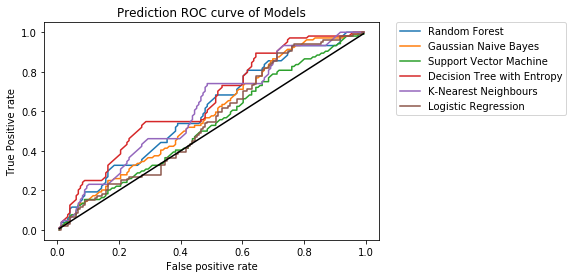

In [47]:

fig, ax = plt.subplots()
line1 = plt.plot(x,y[:,0], label = 'Random Forest' )
line2 = plt.plot(x,y[:,1], label = 'Gaussian Naive Bayes' )
line3 = plt.plot(x,y[:,2], label = 'Support Vector Machine' )
#line4 = plt.plot(x,y[:,3], label = 'Decision Tree with Gini' )
line5 = plt.plot(x,y[:,4], label = 'Decision Tree with Entropy' )
line6 = plt.plot(x,y[:,5], label = 'K-Nearest Neighbours' )
line7 = plt.plot(x,y[:,6], label = 'Logistic Regression' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.plot(x,x, c='#000000')
ax.set(xlabel='False positive rate', ylabel='True Positive rate',
       title='Prediction ROC curve of Models')
savefig('ROC.png')

In [69]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

log_output = pd.DataFrame(index = df.columns[:-1])
log_output['coef'] = logreg.coef_.T
log_output

,coef
SentimentTitle,-0.097595
SentimentHeadline,0.090482
Topic_economy,0.034685
Topic_microsoft,0.065348
Topic_obama,-0.056764
Topic_palestine,-0.061977
_Feb 2016 to April 2016,-0.020428
_May 2016 to July 2016,0.030218
_Nov 2015 to Jan 2016,-0.005509
early10,0.102843


In [64]:
data_rf.columns

Index(['Topic', 'PublishDate', 'SentimentTitle', 'SentimentHeadline',
       'y_classlabel', 'y_maximum', 'y_esssup', 'y_speed', 'y_t_speed', 'ab',
       'bc', 'all', 'early10', 'early20'],
      dtype='object')

In [67]:
logreg.coef_

array([[-0.09759484,  0.09048227,  0.03468469,  0.06534788, -0.05676426,
        -0.06197666, -0.02042809,  0.03021777, -0.00550872,  0.1028426 ,
        -0.61109563]])